$$ N_h = \frac{N_s} {(\alpha * (N_i + N_o))} $$
<a href='https://towardsdatascience.com/choosing-the-right-hyperparameters-for-a-simple-lstm-using-keras-f8e9ed76f046'>url</a>

In [1]:
import numpy as np
X = np.random.gamma(1, size=(1200, 20))
N_train = 1200
from numpy.random import choice
one_indexes = choice(a=N_train, size= int(N_train / 2), replace=False)
X[one_indexes, 0] = 1  # very long term memory.
Y = np.zeros(shape=(1200,1))
Y[one_indexes] = 1

import tensorflow as tf

tf.__version__


fraction_train= 0.8
end_train = int(np.floor(fraction_train*N_train))

x_train, y_train = X[:end_train], Y[:end_train]
x_test, y_test = X[end_train:], Y[end_train:]

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation
import time

In [2]:
y_train.shape

(960, 1)

In [3]:
model = Sequential()

model.add(LSTM(50,input_shape=(20,1)
            ,
        return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(
        100,
        return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('linear'))

start = time.time()
model.compile (loss = 'mse', optimizer = 'rmsprop')

print ('compilation time: '), time.time() - start

compilation time: 


(None, 0.010618448257446289)

In [ ]:
mcp_save = ModelCheckpoint('models/lstm/lstm_.hdf5', save_best_only=True, monitor='val_loss', mode='min')


In [11]:
model.fit(x_train.reshape(960,20,1),y_train, validation_data=(x_test.reshape(*x_test.shape,1),y_test), batch_size=32, epochs=300)

Train on 960 samples, validate on 240 samples
Epoch 1/300
960/960 [==============================] - 0s 442us/sample - loss: 0.1807 - val_loss: 0.1651
Epoch 2/300
960/960 [==============================] - 0s 459us/sample - loss: 0.1784 - val_loss: 0.1660
Epoch 3/300
960/960 [==============================] - 0s 449us/sample - loss: 0.1824 - val_loss: 0.1726
Epoch 4/300
960/960 [==============================] - 0s 467us/sample - loss: 0.1730 - val_loss: 0.1635
Epoch 5/300
960/960 [==============================] - 0s 436us/sample - loss: 0.1718 - val_loss: 0.1681
Epoch 6/300
960/960 [==============================] - 0s 437us/sample - loss: 0.1725 - val_loss: 0.1617
Epoch 7/300
960/960 [==============================] - 0s 443us/sample - loss: 0.1709 - val_loss: 0.1970
Epoch 8/300
960/960 [==============================] - 0s 438us/sample - loss: 0.1785 - val_loss: 0.1730
Epoch 9/300
960/960 [==============================] - 0s 438us/sample - loss: 0.1768 - val_loss: 0.1560
Epoch 10/

Epoch 78/300
960/960 [==============================] - 0s 436us/sample - loss: 0.0890 - val_loss: 0.0801
Epoch 79/300
960/960 [==============================] - 0s 426us/sample - loss: 0.0952 - val_loss: 0.0789
Epoch 80/300
960/960 [==============================] - 0s 434us/sample - loss: 0.0810 - val_loss: 0.0737
Epoch 81/300
960/960 [==============================] - 0s 427us/sample - loss: 0.0800 - val_loss: 0.0842
Epoch 82/300
960/960 [==============================] - 0s 429us/sample - loss: 0.0876 - val_loss: 0.0721
Epoch 83/300
960/960 [==============================] - 0s 432us/sample - loss: 0.0748 - val_loss: 0.0903
Epoch 84/300
960/960 [==============================] - 0s 429us/sample - loss: 0.0791 - val_loss: 0.0677
Epoch 85/300
960/960 [==============================] - 0s 433us/sample - loss: 0.0856 - val_loss: 0.0801
Epoch 86/300
960/960 [==============================] - 0s 455us/sample - loss: 0.0779 - val_loss: 0.0940
Epoch 87/300
960/960 [========================

Epoch 155/300
960/960 [==============================] - 0s 441us/sample - loss: 0.0264 - val_loss: 0.0380
Epoch 156/300
960/960 [==============================] - 0s 429us/sample - loss: 0.0324 - val_loss: 0.0295
Epoch 157/300
960/960 [==============================] - 0s 429us/sample - loss: 0.0333 - val_loss: 0.0257
Epoch 158/300
960/960 [==============================] - 0s 427us/sample - loss: 0.0365 - val_loss: 0.0519
Epoch 159/300
960/960 [==============================] - 0s 434us/sample - loss: 0.0480 - val_loss: 0.0355
Epoch 160/300
960/960 [==============================] - 0s 431us/sample - loss: 0.0434 - val_loss: 0.0344
Epoch 161/300
960/960 [==============================] - 0s 429us/sample - loss: 0.0266 - val_loss: 0.0264
Epoch 162/300
960/960 [==============================] - 0s 435us/sample - loss: 0.0305 - val_loss: 0.0236
Epoch 163/300
960/960 [==============================] - 0s 436us/sample - loss: 0.0350 - val_loss: 0.0375
Epoch 164/300
960/960 [==============

In [12]:
y_predict = model.predict(x_test.reshape(*x_test.shape,1)
                         )
import pandas as pd
hola = pd.DataFrame(x_test)
hola['y_real'] = y_test[:,0]
hola['y_predict'] = y_predict[:,0]

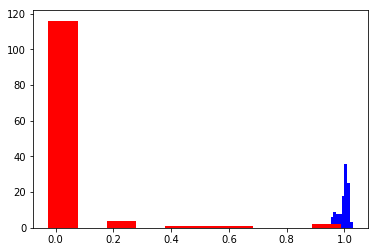

In [13]:
from matplotlib import pyplot as plt
plt.hist(x=hola[hola['y_real'] == 1]['y_predict'], color='blue')
plt.hist(x=hola[hola['y_real'] == 0]['y_predict'], color='red')
plt.show()

# Otras implementaciones

In [ ]:
print('Building STATELESS model...')
max_len = 10
batch_size = 1
model = Sequential()
model.add(LSTM(10, input_shape=(max_len, 1), return_sequences=False, stateful=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, nb_epoch=15,
          validation_data=(x_test, y_test), shuffle=False)
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)

In [ ]:
max_len = 10
batch_size = 1
print('Build STATEFUL model...')
model = Sequential()
model.add(LSTM(10, batch_input_shape=(1, 1, 1), return_sequences=False, stateful=True))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
X_t = X_train.reshape(*X_train.shape, 1)
Y_t = Y_train.reshape(*Y_train.shape)
X_ts = X_test.reshape(*X_test.shape, 1)
Y_ts = Y_test.reshape(*Y_test.shape)

In [ ]:
Y_t

In [ ]:
Y_ts.shape

In [45]:
print('Train...')
for epoch in range(15):
    mean_tr_acc = []
    mean_tr_loss = []
    for i in range(len(X_t)):
        y_true = Y_t[i]
        for j in range(max_len):
            tr_loss, tr_acc = model.train_on_batch(np.expand_dims(np.expand_dims(X_t[i][j], axis=1), axis=1),
                                                   np.array([y_true]))
            mean_tr_acc.append(tr_acc)
            mean_tr_loss.append(tr_loss)
        model.reset_states()

    print('accuracy training = {}'.format(np.mean(mean_tr_acc)))
    print('loss training = {}'.format(np.mean(mean_tr_loss)))
    print('___________________________________')

    mean_te_acc = []
    mean_te_loss = []
    for i in range(len(X_test)):
        for j in range(max_len):
            te_loss, te_acc = model.test_on_batch(np.expand_dims(np.expand_dims(X_ts[i][j], axis=1), axis=1),
                                                  Y_ts[i])
            mean_te_acc.append(te_acc)
            mean_te_loss.append(te_loss)
        model.reset_states()

        for j in range(max_len):
            y_pred = model.predict_on_batch(np.expand_dims(np.expand_dims(X_ts[i][j], axis=1), axis=1))
        model.reset_states()

    print('accuracy testing = {}'.format(np.mean(mean_te_acc)))
    print('loss testing = {}'.format(np.mean(mean_te_loss)))
    print('___________________________________')

Train...
accuracy training = 0.5260999798774719
loss training = 0.6926411390304565
___________________________________
accuracy testing = 0.4099999964237213
loss testing = 0.7231473326683044
___________________________________
accuracy training = 0.5304999947547913
loss training = 0.6913561224937439
___________________________________
accuracy testing = 0.41100001335144043
loss testing = 0.72064208984375
___________________________________
accuracy training = 0.536300003528595
loss training = 0.689719557762146
___________________________________
accuracy testing = 0.42649999260902405
loss testing = 0.7194544076919556
___________________________________
accuracy training = 0.5774999856948853
loss training = 0.6765573024749756
___________________________________
accuracy testing = 0.534500002861023
loss testing = 0.6807519793510437
___________________________________
accuracy training = 0.7297000288963318
loss training = 0.5656906366348267
___________________________________
accuracy tes

# Second part

In [69]:
from tensorflow.python.keras import models, layers

def define_model(len_ts,
                 hidden_neurons = 10,
                 nfeature=1,
                 batch_size=None,
                 stateful=False):
    in_out_neurons = 1
    
    inp = layers.Input(batch_shape= (batch_size, len_ts, nfeature),
                       name="input")  

    rnn = layers.LSTM(hidden_neurons, 
                    return_sequences=True,
                    
                    stateful=stateful,
                    name="RNN")(inp)

    dens = layers.Dense(in_out_neurons, activation="sigmoid",name="dense")(rnn)
    model = models.Model(inputs=[inp],outputs=[dens])
    
    model.compile(loss="binary_crossentropy",
                  optimizer="adam", metrics=['accuracy'])
    return(model,(inp,rnn,dens))

In [ ]:
21

In [70]:
X_t = X_train.reshape(*X_train.shape, 1)
Y_t = np.array(list(map(lambda el: np.repeat(el,20),Y_train))).reshape(Y_train.shape[0],20,1)
X_ts = X_test.reshape(*X_test.shape, 1)
Y_ts = np.array(list(map(lambda el: np.repeat(el,20),Y_test))).reshape(Y_test.shape[0],20,1)

In [71]:
hunits = 32
model_stateless, _ = define_model(
                    hidden_neurons = hunits,
                    len_ts = X_t.shape[1])
model_stateless.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 20, 1)             0         
_________________________________________________________________
RNN (LSTM)                   (None, 20, 10)            480       
_________________________________________________________________
dense (Dense)                (None, 20, 1)             11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [75]:
import time
start = time.time()
history = model_stateless.fit(X_t,Y_t,
                             batch_size=1,
                             epochs=100,
                             verbose=2,
                             validation_data=(X_ts,Y_ts))
end = time.time()
print("Time Took :{:3.2f} min".format( (end-start)/60 ))

Train on 1000 samples, validate on 200 samples
Epoch 1/100
 - 21s - loss: 0.6889 - acc: 0.5385 - val_loss: 0.6785 - val_acc: 0.5858
Epoch 2/100
 - 22s - loss: 0.6801 - acc: 0.5662 - val_loss: 0.6499 - val_acc: 0.6410
Epoch 3/100
 - 21s - loss: 0.6698 - acc: 0.5690 - val_loss: 0.6423 - val_acc: 0.6045
Epoch 4/100
 - 22s - loss: 0.6120 - acc: 0.6625 - val_loss: 0.5942 - val_acc: 0.6845
Epoch 5/100
 - 22s - loss: 0.6564 - acc: 0.6407 - val_loss: 0.6612 - val_acc: 0.5567
Epoch 6/100
 - 22s - loss: 0.6579 - acc: 0.6178 - val_loss: 0.6312 - val_acc: 0.6630
Epoch 7/100
 - 22s - loss: 0.6157 - acc: 0.6627 - val_loss: 0.5800 - val_acc: 0.6807
Epoch 8/100
 - 22s - loss: 0.5682 - acc: 0.6999 - val_loss: 0.5504 - val_acc: 0.7212
Epoch 9/100
 - 22s - loss: 0.5440 - acc: 0.7358 - val_loss: 0.5339 - val_acc: 0.7520
Epoch 10/100
 - 22s - loss: 0.5365 - acc: 0.7298 - val_loss: 0.5176 - val_acc: 0.7522
Epoch 11/100
 - 22s - loss: 0.5308 - acc: 0.7499 - val_loss: 0.5163 - val_acc: 0.7515
Epoch 12/100
 - 

KeyboardInterrupt: 

In [76]:
y_pred = model_stateless.predict_on_batch(X_ts)

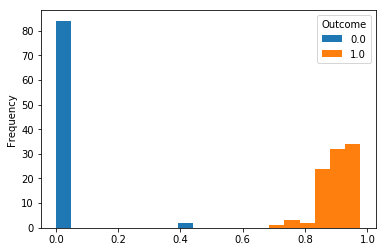

In [78]:
import pandas as pd
df = pd.DataFrame({'Glucose':y_pred[:,-1,0] , 'Outcome': Y_ts[:,-1,0] })

# pivot and plot
df.pivot(columns="Outcome", values="Glucose").plot.hist(bins=20)

plt.show()

ValueError: Invalid RGBA argument: 1.0

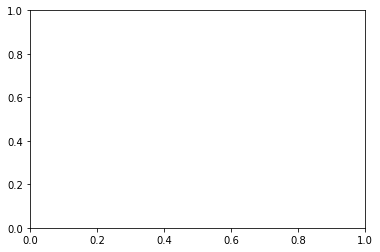

In [79]:
from matplotlib import pyplot as plt
plt.hist(y_pred[:,-1,0], color = Y_ts[:,-1,0] , bins=50)

In [48]:
Y_ts[:,-1,0]

array([1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0.])